# IUI Tutorial 9: Optimization-based Adaptive Keyboard


> reference repository: https://github.com/Houchangxi/heuristic-algorithm

## Traveling Salesman Problem (TSP)

Given:

A set of n cities and the distances or costs between every pair of cities. \
Find the shortest possible route that: \
  Starts and ends at the same city.\
  Visits each city exactly once. \

In [2]:
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import sys
import copy
import time
import numpy as np

In [3]:
def load_position(file_name):
    data = pd.read_csv(file_name,names=['index','lat','lon'])
    city_x = data['lat'].tolist()
    city_y = data['lon'].tolist()
    return city_x,city_y

def draw_map(city_x,city_y):
    plt.scatter(city_x, city_y, marker='o',label='City')
    for i, (x, y) in enumerate(zip(city_x, city_y)):
      plt.annotate(
          str(i),
          (x, y),
          textcoords="offset points",
          xytext=(5, 5),
          ha='center',
          fontsize=10,
          color='blue'
        )
    plt.legend(loc='upper left')
    plt.margins(0)
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Path Planninng Problem")
    plt.show()

file_name = 'verify_order_position_10.csv'
city_x,city_y = load_position(file_name)
draw_map(city_x, city_y)

## Simulated Annealing

In [4]:
#Initialization
T0 = 30 # initial temperature
Tend = 1e-8 #final temperature
N = 50 #iteractions
a = 0.98 #cooling rate

In [5]:
def init_dis_matrix(length):
    distance_matrix = [[0 for col in range(length)] for raw in range(length)]
    return distance_matrix

#create distance matrix
def getdistance(city_x,city_y,n_len,distance):
    for i in range(n_len):
        for j in range(n_len):
            x = pow(city_x[i] - city_x[j], 2)
            y = pow(city_y[i] - city_y[j], 2)
            distance[i][j] = pow(x + y, 0.5)
    for i in range(n_len):
        for j in range(n_len):
            if distance[i][j] == 0:
                distance[i][j] = sys.maxsize

# calculate total distance
def cacl_best(rou,n_len,distance):
    sumdis = 0.0
    for i in range(n_len-1):
        sumdis += distance[rou[i]][rou[i+1]]
    sumdis += distance[rou[n_len-1]][rou[0]]
    return sumdis

#get new solution
def getnewroute(route, time,n_len):
    #2-swap for even iterations
    current = copy.copy(route)

    if time % 2 == 0:
        u = random.randint(1, n_len-1) # aviod to change start and end cities
        v = random.randint(1, n_len-1) # aviod to change start and end cities
        temp = current[u]
        current[u] = current[v]
        current[v] = temp
    #3-swap for odd iterations
    else:
        temp2 = random.sample(range(1, n_len), 3) # aviod to change start and end cities
        temp2.sort()
        u = temp2[0]
        v = temp2[1]
        w = temp2[2]
        w1 = w + 1
        temp3 = [0 for col in range(v - u + 1)]
        j = 0
        for i in range(u, v + 1):
            temp3[j] = current[i]
            j += 1

        for i2 in range(v + 1, w + 1):
            current[i2 - (v-u+1)] = current[i2]
        w = w - (v-u+1)
        j = 0

        for i3 in range(w+1, w1):
            current[i3] = temp3[j]
            j += 1

    return current

def draw(best,city_x,city_y,n_len):
    result_x = [0 for col in range(n_len+1)]
    result_y = [0 for col in range(n_len+1)]

    for i in range(n_len):
        result_x[i] = city_x[best[i]]
        result_y[i] = city_y[best[i]]
    result_x[n_len] = result_x[0]
    result_y[n_len] = result_y[0]
    plt.plot(result_x, result_y, marker='>', mec='r', mfc='w',label='Route')
    for i, (x, y) in enumerate(zip(city_x, city_y)):
      plt.annotate(
          str(i),
          (x, y),
          textcoords="offset points",
          xytext=(5, 5),
          ha='center',
          fontsize=10,
          color='blue'
        )
    plt.legend()
    plt.margins(0)
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Path Planninng Problem")
    plt.show()

In [6]:
file_name = 'verify_order_position_10.csv'
city_x,city_y = load_position(file_name)
n_len = len(city_x)
print(n_len)
distance = init_dis_matrix(n_len)
print(distance)
getdistance(city_x,city_y,n_len,distance)
print(distance)
route = [0] * (n_len + 1)
print(route)
route[1:n_len] = random.sample(range(1, n_len), n_len-1)  # random initial solution
print(route)
total_dis = cacl_best(route,n_len,distance)
print("initial path：", route)
print("initial distance：", total_dis)
draw(route,city_x,city_y,n_len)

9
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[9223372036854775807, 0.021217473351220827, 0.031206097303090367, 0.004493350158842459, 0.00666846862855381, 0.03388708277470538, 0.0638240816095255, 0.01933143482853972, 0.0031691569162780957], [0.021217473351220827, 9223372036854775807, 0.013960420230071212, 0.018078651213516025, 0.026738338447252496, 0.02360344917273367, 0.0437792205674112, 0.025657648303771038, 0.022365198886885262], [0.031206097303090367, 0.013960420230071212, 9223372036854775807, 0.029441015012737562, 0.03495411396674299, 0.012559482013591219, 0.03296517375973957, 0.03951297796978252, 0.031115189908631456], [0.004493350158842459, 0.018078651213516025, 0.029441015012737562, 9223372036854775807, 0.011159674031974777, 0.03377500778933897, 0.061484845072017

current temperature is： 9.828994188954707e-09
best path is： [0, 8, 4, 5, 6, 2, 1, 7, 3, 0]
best distance is ： 0.17341070934548036


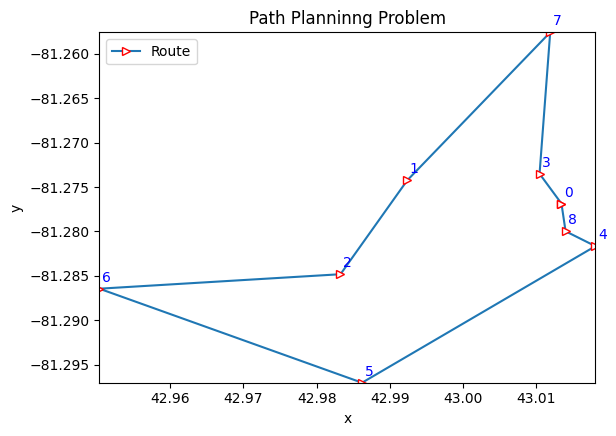

In [7]:
newroute = []
new_total_dis = 0.0
best = route
best_total_dis = total_dis
t = T0

while True:
    if t <= Tend:
        break
    for i in range(N):
        newroute = getnewroute(route, i, n_len)
        new_total_dis = cacl_best(newroute,n_len,distance)
        delt = new_total_dis - total_dis
        if delt <= 0:
            route = newroute
            total_dis = new_total_dis
            if best_total_dis > new_total_dis:
                best = newroute
                best_total_dis = new_total_dis
        elif delt > 0:
            p = math.exp(-delt / t)
            ranp = random.uniform(0, 1)
            if ranp < p:
                route = newroute
                total_dis = new_total_dis
    t = t * a

print("current temperature is：", t)
print("best path is：", best)
print("best distance is ：", best_total_dis)
draw(best,city_x,city_y,n_len)

## Genetic Algorithm

In [9]:
def load_position(file_name):
    data = pd.read_csv(file_name,names=['index','lat','lon'])
    city_x = data['lat'].tolist()
    city_y = data['lon'].tolist()
    return city_x,city_y

def get_distance_matrix(city_x, city_y):
    distance = [[0 for col in range(len(city_x))] for raw in range(len(city_x))]
    for i in range(n_len):
      for j in range(n_len):
          x = pow(city_x[i] - city_x[j], 2)
          y = pow(city_y[i] - city_y[j], 2)
          distance[i][j] = pow(x + y, 0.5)
    return np.array(distance)

def initialize_population(size, num_cities):
    population = []
    for _ in range(size):
        route = list(range(1, num_cities))
        random.shuffle(route)
        route = [0] + route + [0]  # initial and end at city 0
        population.append(route)
    return population

def calculate_fitness(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]
    return total_distance

# seletion roulette wheel
def select_parents(population, distance_matrix):
    fitness_values = [1 / calculate_fitness(route, distance_matrix) for route in population]
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    parents = np.random.choice(len(population), size=2, p=probabilities, replace=False)
    return population[parents[0]], population[parents[1]]

def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(1, size - 1), 2))
    child1 = [-1] * size
    child2 = [-1] * size
    child1[0] = 0
    child2[0] = 0
    child1[-1] = 0
    child2[-1] = 0

    # Step 1: Copy crossover segment
    child1[start:end] = parent2[start:end]
    child2[start:end] = parent1[start:end]

    # Step 2: Fill remaining cities from the other parent, avoiding repetition of cities
    def fill_remaining(child, parent):
        child_idx = 0
        for city in parent:
            if city not in child:  # Ensure city is not already in child
              if child_idx < size:
                  while child[child_idx] != -1:  # Skip already filled positions
                      child_idx += 1
                  child[child_idx] = city  # Fill the empty position

    fill_remaining(child1, parent1)
    fill_remaining(child2, parent2)

    return child1, child2

# mutation
def mutate(route, pm):
    if random.random() < pm:
        i, j = random.sample(range(1, len(route) - 1), 2)  # do not change start and end city
        route[i], route[j] = route[j], route[i]
    return route

In [13]:
# Initialization
p_num = 100  #size of population
gen = 250  #genrations
pm = 0.1  #mutation rate

[[0.         0.02121747 0.0312061  0.00449335 0.00666847 0.03388708
  0.06382408 0.01933143 0.00316916]
 [0.02121747 0.         0.01396042 0.01807865 0.02673834 0.02360345
  0.04377922 0.02565765 0.0223652 ]
 [0.0312061  0.01396042 0.         0.02944102 0.03495411 0.01255948
  0.03296517 0.03951298 0.03111519]
 [0.00449335 0.01807865 0.02944102 0.         0.01115967 0.03377501
  0.06148485 0.01598411 0.00738292]
 [0.00666847 0.02673834 0.03495411 0.01115967 0.         0.03538325
  0.06790501 0.02484314 0.00440456]
 [0.03388708 0.02360345 0.01255948 0.03377501 0.03538325 0.
  0.03739304 0.0470683  0.03260671]
 [0.06382408 0.04377922 0.03296517 0.06148485 0.06790501 0.03739304
  0.         0.06798965 0.06398959]
 [0.01933143 0.02565765 0.03951298 0.01598411 0.02484314 0.0470683
  0.06798965 0.         0.02248736]
 [0.00316916 0.0223652  0.03111519 0.00738292 0.00440456 0.03260671
  0.06398959 0.02248736 0.        ]]
[[0, 5, 4, 7, 6, 8, 3, 2, 1, 0], [0, 3, 5, 1, 6, 2, 4, 8, 7, 0], [0, 6, 

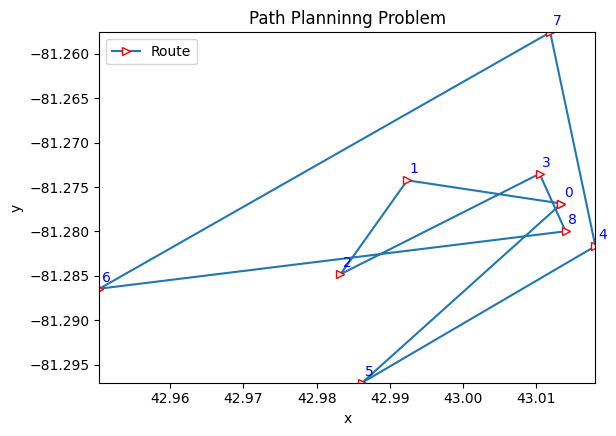

In [11]:
file_name = 'verify_order_position_10.csv'
city_x,city_y = load_position(file_name)
n_len = len(city_x)
distance_matrix = get_distance_matrix(city_x, city_y)
print(distance_matrix)
population = initialize_population(p_num, len(distance_matrix))
print(population)
draw(population[0], city_x, city_y, len(distance_matrix))

Generation 0: Best Distance = 0.18661779994048847
Generation 10: Best Distance = 0.18066150344883003
Generation 20: Best Distance = 0.17856418730687967
Generation 30: Best Distance = 0.17856418730687967
Generation 40: Best Distance = 0.17856418730687967
Generation 50: Best Distance = 0.17856418730687967
Generation 60: Best Distance = 0.17856418730687967
Generation 70: Best Distance = 0.17856418730687967
Generation 80: Best Distance = 0.17856418730687967
Generation 90: Best Distance = 0.1741334819170435
Generation 100: Best Distance = 0.1741334819170435
Generation 110: Best Distance = 0.1741334819170435
Generation 120: Best Distance = 0.17341070934548036
Generation 130: Best Distance = 0.17341070934548036
Generation 140: Best Distance = 0.17341070934548036
Generation 150: Best Distance = 0.17341070934548036
Generation 160: Best Distance = 0.17341070934548036
Generation 170: Best Distance = 0.17341070934548036
Generation 180: Best Distance = 0.17341070934548036
Generation 190: Best Dista

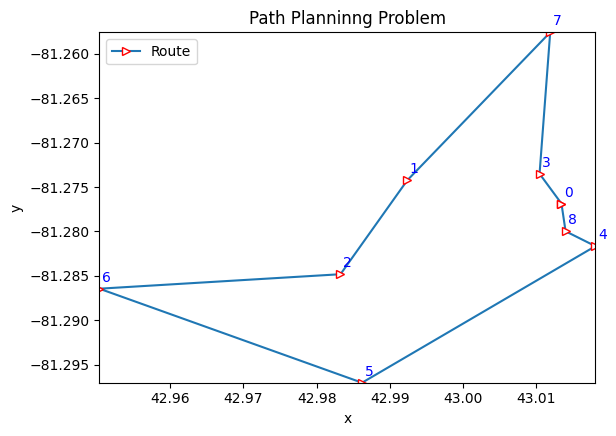

In [15]:
best_route = None
best_distance = float('inf')

for generation in range(gen):
    population = sorted(population, key=lambda route: calculate_fitness(route, distance_matrix))
    if calculate_fitness(population[0], distance_matrix) < best_distance:
      best_route = population[0]
      best_distance = calculate_fitness(best_route, distance_matrix)

    # print progress
    if generation % 10 == 0:
      print(f"Generation {generation}: Best Distance = {best_distance}")

    # get next genration
    new_population = []
    for _ in range(p_num // 2):
      parent1, parent2 = select_parents(population, distance_matrix)
      child1, child2 = crossover(parent1, parent2)
      child1 = mutate(child1, pm)
      child2 = mutate(child2, pm)
      new_population.extend([child1, child2])

    population = new_population

print("Best Route:", best_route)
print("Best Distance:", best_distance)
draw(best_route, city_x, city_y, len(distance_matrix))